In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split



In [128]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

df = pd.read_csv(filepath, header = None)

In [129]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [130]:
df.shape

(2772, 7)

In [131]:
names = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns =names
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [132]:
df.replace('?', np.nan, inplace = True)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [134]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [135]:
df.describe()

,gender,bmi,no_of_children,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1.507215,30.701349,1.101732,2.559885,13261.369959
std,0.500038,6.129449,1.214806,1.130761,12151.768945
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.447500,1.000000,3.000000,9333.014350
75%,2.000000,34.770000,2.000000,4.000000,16577.779500
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [136]:
## We did not find any null values as part of learning , practicing how to manage null values

df['smoker'].replace(np.nan, df['smoker'].value_counts().idxmax(), inplace =  True)

# for integer values first convert to float

df['age'].replace(np.nan, df['age'].astype('float').mean(), inplace= True)

df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [137]:
df[['charges']] = np.round(df[['charges']], 2)

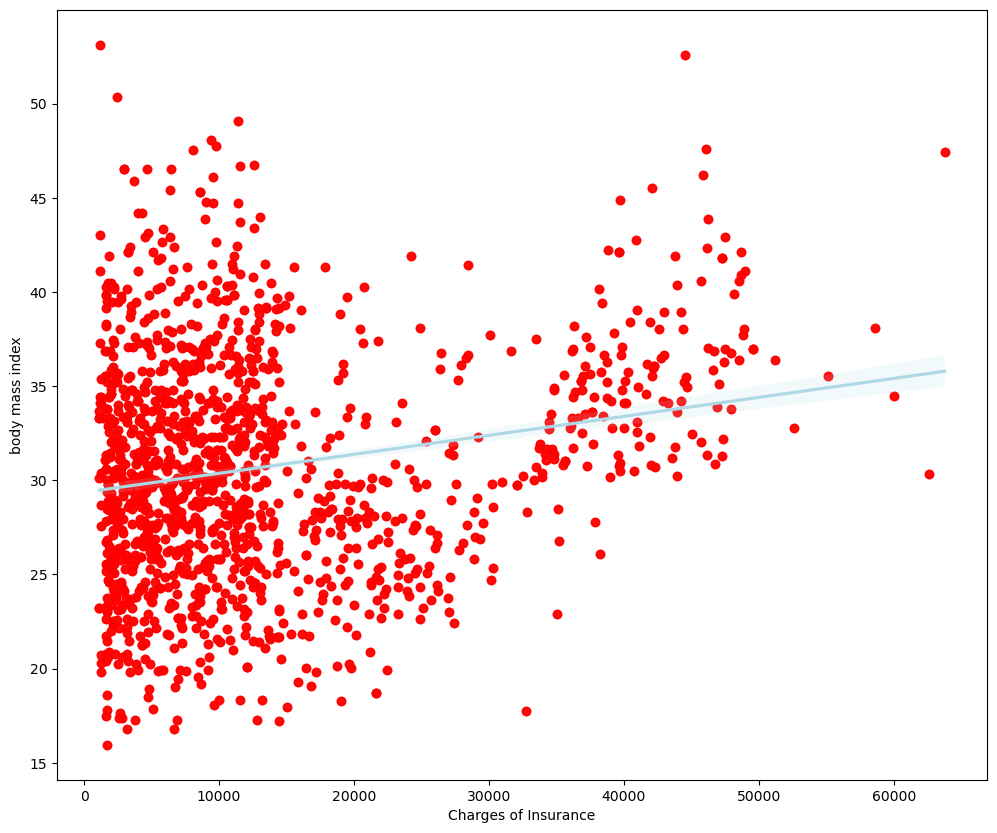

In [138]:
plt.figure(figsize = (12, 10))
sns.regplot(x = df['charges'], y = df['bmi'], scatter_kws={'color': 'red'}, 
             line_kws={'color': 'lightblue'})
plt.xlabel('Charges of Insurance')
plt.ylabel('body mass index')
plt.show()


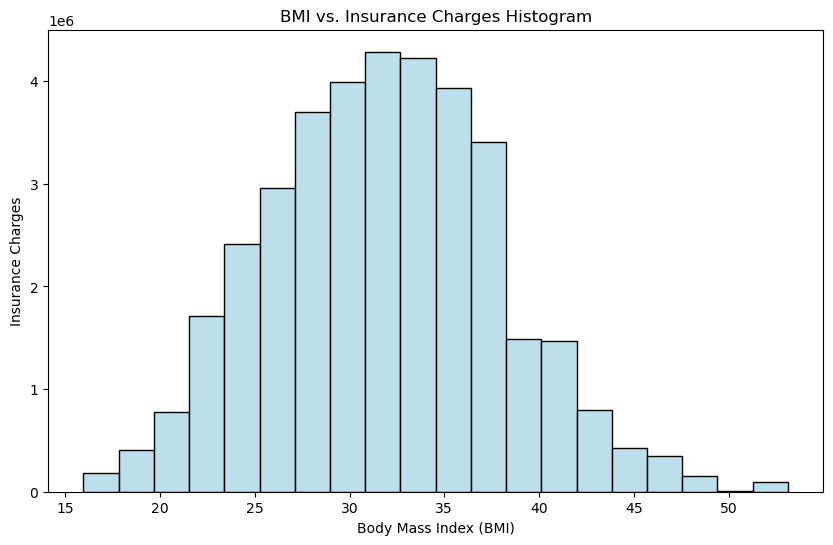

In [139]:

# Create a histogram of BMI vs. Charges using seaborn with specified bins
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', weights='charges', color='lightblue', alpha=0.8, bins=20)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Insurance Charges')
plt.title('BMI vs. Insurance Charges Histogram')
plt.show()


<Axes: xlabel='smoker', ylabel='charges'>

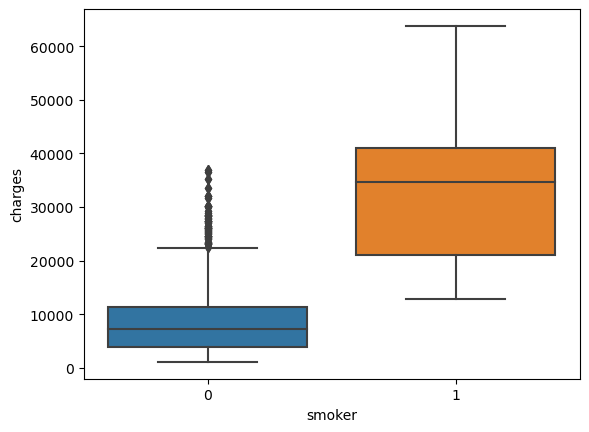

In [140]:
sns.boxplot(x="smoker", y="charges", data=df)


<Axes: xlabel='smoker', ylabel='bmi'>

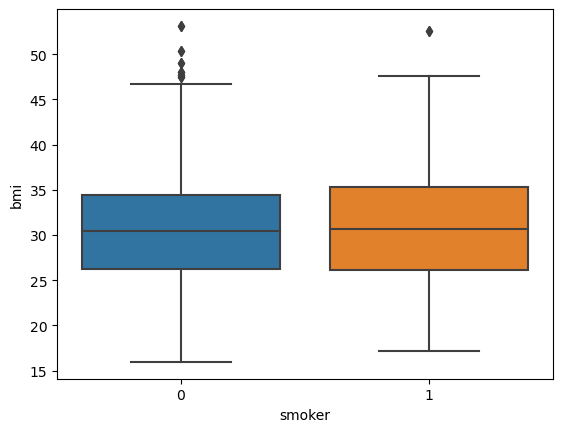

In [141]:
sns.boxplot(x="smoker", y="bmi", data=df)


In [144]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [142]:
# Using Bmi for prediction
model = LinearRegression()
X = df[['bmi']]
y  = df['charges']
model.fit(X, y)
model_pred = model.predict(X)[:5]
model_pred

array([12151.47746847, 14477.16713658, 14172.09370482, 10093.22230223,
       12539.75274526])

In [143]:
model.predict([[25]])

C:\Users\thall\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11002.49960859])

In [87]:
model = LinearRegression()
X = df[['smoker']]
y  = df['charges']
model.fit(X, y)
model_pred = model.predict(X)[:5]
model_pred

array([32223.1398227 ,  8417.87439312,  8417.87439312,  8417.87439312,
        8417.87439312])

In [89]:
model.predict(np.array([[2]]))

C:\Users\thall\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56028.40525227])

In [61]:
print(model.score(X, y))

0.6221791733924185


In [125]:
## Multiple Regression
XM = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df['charges']
model.fit(XM, y)
new_model_pred = model.predict(XM)
print(new_model_pred[:5])
print(model.score(XM, y))
## Mean square after predicting
print("MSE: ", mean_squared_error(y, new_model_pred))

[25652.47075054  3441.45424213  6740.67295264  4125.84435892
  5897.76335859]
0.7504083820289634
MSE:  36842772.50180054


In [126]:
print(model.predict(np.array([[33, 1, 25, 1, 2, 3]])))

[52778.80212903]


C:\Users\thall\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### The multiple regression is performing better than Linear Regression

In [70]:
## Creating Pipelines
input = [('scaler', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe  = Pipeline(input)

pipe.fit(XM, y)

## r2_score

y_pred = pipe.predict(XM)

print("r2_score: ", r2_score(y, y_pred))


r2_score:  0.8452168732325275


In [71]:
### Model Refinement

In [72]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(XM, y, test_size = 0.2, random_state = 42)

In [79]:
## Using Ridge Regression
Ridge_Model = Ridge(alpha = 0.001)
Ridge_Model.fit(X_train, y_train)

y_cap = Ridge_Model.predict(X_test)

print(r2_score(y_cap, y_test))

0.6279210945809197


In [86]:
poly = PolynomialFeatures(degree = 2)
poly_fit = poly.fit_transform(X_train)
poly_test_fit = poly.transform(X_test)

Ridge_Model.fit(poly_fit, y_train)

y_poly_pred = Ridge_Model.predict(poly_test_fit)

print("R2_score: ", r2_score(y_test, y_poly_pred))

new_data = np.array([[23, 2, 25, 1, 2, 3]])

new_data_poly = poly.transform(new_data)

Ridge_Model.predict(new_data_poly)

R2_score:  0.8339486823068931


C:\Users\thall\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([16473.82679319])